<center><h1>Project 3: United States GDP</h1></center>

**Data Wrangler:** Michael Speer

**Data Scientist:** Elijah Taber

**Data Visualizer/Presenter:** Caleb Trimble

### Documentation can be found here: https://apps.bea.gov/API/docs/index.htm

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
def apiErrorCheck(response):
    """This is just a simple API response-check. This does not check if the API responded with bad data"""
    if response.status_code == 200:
        print('API Call: Success')
    else:
        print('API Call: Fail')
        raise Exception(f"Status Code indicates an error: {response.status_code}\n{response.text}")

In [4]:
## Don't put keys in plain strings in cloud environments like I am doing
key = "9575E76B-3DF4-49D9-814A-C970E4774140"

url = "http://apps.bea.gov/api/data"

In [5]:
## This API call isn't really used but is helpful to make sure the key works
params = {
    'UserID': key
    , 'method': 'GETDATASETLIST'
    , 'ResultFormat': 'JSON'
}

response = requests.get(url = url, params = params)
apiErrorCheck(response)

API Call: Success


## Set up GDP by Industry Data

In [6]:
## This gives available parameters for the GDPbyIndustry table
# params['method'] = 'GetParameterList'
# params['DatasetName'] = 'GDPbyIndustry'
# response = requests.get(url = url, params = params)
# response.json()

In [ ]:
params['method'] = 'GetData'
params['DatasetName'] = 'GDPbyIndustry'
params['Frequency'] = 'Q'
params['Industry'] = 'ALL'
params['TableID'] = 'ALL'
params['Year'] = 'ALL'

response = requests.get(url = url, params = params)
apiErrorCheck(response)

API Call: Success


In [ ]:
dfGDPbyIndustry = pd.DataFrame(response.json()['BEAAPI']['Results'][0]['Data'])

dfGDPbyIndustry = dfGDPbyIndustry[dfGDPbyIndustry['TableID'] == '1'].drop(['TableID', 'Frequency', 'NoteRef'], axis = 1).pivot(index = ['Year', 'Quarter'], columns=['Industry', 'IndustrYDescription'], values='DataValue')

dfGDPbyIndustry

Industry                                                     11  111CA  \
IndustrYDescription Agriculture, forestry, fishing, and hunting  Farms   
Year Quarter                                                             
2005 I                                                    131.7  108.2   
     II                                                   132.1  108.6   
     III                                                  130.1  106.3   
     IV                                                   126.8  102.2   
2006 I                                                    122.4   95.5   
     II                                                   125.3   96.7   
     III                                                  129.0   98.6   
     IV                                                   131.8  102.2   
2007 I                                                    145.2  116.6   
     II                                                   142.3  113.5   
     III                                                  144.0  115.7   
     IV                                                   153.5  125.6   
2008 I                                                    157.7  130.2   
     II                                                   153.1  125.2   
     III                                                  140.4  112.2   
     IV                                                   135.0  107.5   
2009 I                                                    123.9   96.9   
     II                                                   124.0   97.5   
     III                                                  128.4  101.7   
     IV                                                   140.9  113.8   
2010 I                                                    135.4  107.7   
     II                                                   140.5  111.7   
     III                                                  148.8  119.8   
     IV                                                   158.2  129.0   
2011 I                                                    184.1  155.5   
     II                                                   175.1  146.8   
     III                                                  181.3  152.4   
     IV                                                   179.1  149.9   
2012 I                                                    180.2  149.7   
     II                                                   178.4  147.6   
     III                                                  176.5  145.8   
     IV                                                   182.7  151.8   
2013 I                                                    217.8  187.0   
     II                                                   225.5  194.4   
     III                                                  222.4  190.9   
     IV                                                   197.8  165.6   
2014 I                                                    196.5  164.0   
     II                                                   215.3  182.3   
     III                                                  196.0  162.1   
     IV                                                   194.5  159.9   
2015 I                                                    177.6  142.3   
     II                                                   181.1  145.9   
     III                                                  186.7  149.8   
     IV                                                   183.2  147.0   
2016 I                                                    170.9  133.2   
     II                                                   172.1  135.0   
     III                                                  167.5  130.7   
     IV                                                   159.5  122.1   
2017 I                                                    181.4  143.6   
     II                                                   180.2  142.5   
     III                                                  171.3  133.2   
    

In [ ]:
dfGDPbyIndustry.shape

(80, 99)

In [ ]:
dfGDPbyIndustry.describe()

Industry,11,111CA,113FF,21,211,212,213,22,23,311FT,313TT,315AL,31G,31ND,321,322,323,324,325,326,327,331,332,333,334,335,3361MV,3364OT,337,339,33DG,42,441,445,44RT,452,481,482,483,484,485,486,487OS,48TW,493,4A0,51,511,512,513,514,52,521CI,523,524,525,53,531,532RL,54,5411,5412OP,5415,55,56,561,562,6,61,62,621,622,623,624,7,71,711AS,713,72,721,722,81,FIRE,G,GDP,GF,GFE,GFG,GFGD,GFGN,GSL,GSLE,GSLG,HS,ORE,PGOOD,PROF,PSERV,PVT
IndustrYDescription,"Agriculture, forestry, fishing, and hunting",Farms,"Forestry, fishing, and related activities",Mining,Oil and gas extraction,"Mining, except oil and gas",Support activities for mining,Utilities,Construction,Food and beverage and tobacco products,Textile mills and textile product mills,Apparel and leather and allied products,Manufacturing,Nondurable goods,Wood products,Paper products,Printing and related support activities,Petroleum and coal products,Chemical products,Plastics and rubber products,Nonmetallic mineral products,Primary metals,Fabricated metal products,Machinery,Computer and electronic products,"Electrical equipment, appliances, and components","Motor vehicles, bodies and trailers, and parts",Other transportation equipment,Furniture and related products,Miscellaneous manufacturing,Durable goods,Wholesale trade,Motor vehicle and parts dealers,Food and beverage stores,Retail trade,General merchandise stores,Air transportation,Rail transportation,Water transportation,Truck transportation,Transit and ground passenger transportation,Pipeline transportation,Other transportation and support activities,Transportation and warehousing,Warehousing and storage,Other retail,Information,"Publishing industries, except internet (includes software)",Motion picture and sound recording industries,Broadcasting and telecommunications,"Data processing, internet publishing, and other information services",Finance and insurance,"Federal Reserve banks, credit intermediation, and related activities","Securities, commodity contracts, and investments",Insurance carriers and related activities,"Funds, trusts, and other financial vehicles",Real estate and rental and leasing,Real estate,Rental and leasing services and lessors of intangible assets,"Professional, scientific, and technical services",Legal services,"Miscellaneous professional, scientific, and technical services",Computer systems design and related services,Management of companies and enterprises,Administrative and waste management services,Administrative and support services,Waste management and remediation services,"Educational services, health care, and social assistance",Educational services,Health care and social assistance,Ambulatory health care services,Hospitals,Nursing and residential care facilities,Social assistance,"Arts, entertainment, recreation, accommodation, and food services","Arts, entertainment, and recreation","Performing arts, spectator sports, museums, and related activities","Amusements, gambling, and recreation industries",Accommodation and food services,Accommodation,Food services and drinking places,"Other services, except government","Finance, insurance, real estate, rental, and leasing",Government,Gross domestic product,Federal,Government enterprises,General government,National defense,Nondefense,State and local,Government enterprises,General government,Housing,Other real estate,Private goods-producing industries<sup>1</sup>,Professional and business services,Private services-producing industries<sup>2</sup>,Private industries
count,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
unique,79,77,66,80,79,75,74,77,79,80,41,37,80,80,71,66,53,76,80,71,74,71,77,75,72,69,77,78,60,67,80,80,78,73,79,70,79,71,58,78,70,74,77,80,66,78,79,77,76,75,77,79,78,79,80,64,79,80,78,80,76,79,80,80

## Industry GDP as a Proportion of Total GDP ##

In [ ]:
# Convert all columns in dfGDPbyIndustry to numeric where possible
dfGDPbyIndustry = dfGDPbyIndustry.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Preserve original data structure for reference
dfFlattened = dfGDPbyIndustry.copy()
dfFlattened.columns = dfFlattened.columns.get_level_values(1)
dfFlattened = dfFlattened.rename_axis(["Year", "Quarter"]).reset_index()


In [ ]:
# Convert "Year" and "Quarter" to proper types
dfFlattened["Year"] = pd.to_numeric(dfFlattened["Year"], errors="coerce")
dfFlattened["Quarter"] = dfFlattened["Quarter"].replace({"I": 1, "II": 2, "III": 3, "IV": 4}).astype(int)


In [ ]:
dfFlattened["Total_GDP"] = dfFlattened.drop(columns=["Year", "Quarter"]).sum(axis=1)

In [ ]:
# Confirm final structure before proceeding
print(dfFlattened.dtypes)
print(dfFlattened.head())

IndustrYDescription
Year                                                   int64
Quarter                                                int64
Agriculture, forestry, fishing, and hunting          float64
Farms                                                float64
Forestry, fishing, and related activities            float64
                                                      ...   
Private goods-producing industries<sup>1</sup>       float64
Professional and business services                   float64
Private services-producing industries<sup>2</sup>    float64
Private industries                                   float64
Total_GDP                                            float64
Length: 102, dtype: object
IndustrYDescription  Year  Quarter  \
0                    2005        1   
1                    2005        2   
2                    2005        3   
3                    2005        4   
4                    2006        1   

IndustrYDescription  Agriculture, forestry, fishing, 

In [ ]:
# Calculate industry GDP proportion
dfProportion = dfFlattened[selected_industries].div(dfFlattened["Total_GDP"], axis=0) * 100


In [ ]:
# Select key industries
selected_industries = ["Manufacturing", "Finance and insurance", "Health care and social assistance"]
dfSelected = dfProportion[selected_industries].copy()


In [ ]:
# Restore "Year" and "Quarter" for proper indexing
dfSelected["Year"] = dfFlattened["Year"]
dfSelected["Quarter"] = dfFlattened["Quarter"]
dfSelected = dfSelected.set_index(["Year", "Quarter"])


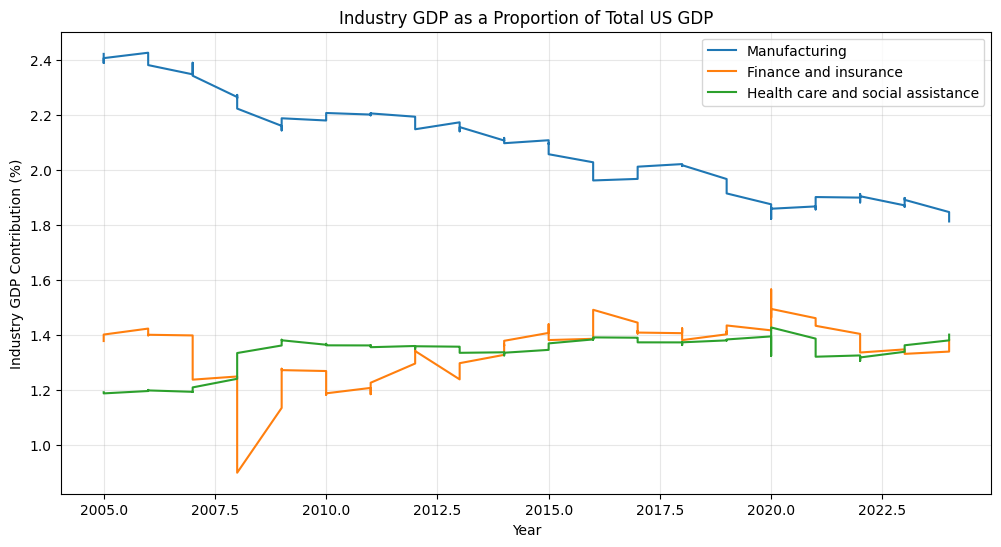

In [ ]:
# Plot proportions over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for industry in selected_industries:
    plt.plot(dfSelected.index.get_level_values("Year"), dfSelected[industry], label=industry)

plt.title("Industry GDP as a Proportion of Total US GDP")
plt.xlabel("Year")
plt.ylabel("Industry GDP Contribution (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## Set Up State GDP Data

In [ ]:
# params['method'] = 'GetParameterList'
# params['DatasetName'] = 'Regional'
# response = requests.get(url = url, params = params)
# response.json()

In [ ]:
params['method'] = 'GetData'
params['DatasetName'] = 'Regional'
params['GeoFips'] = 'STATE'
params['LineCode'] = '1'
params['TableName'] = 'SQGDP1'
params['Year'] = 'ALL'

response = requests.get(url = url, params = params)
apiErrorCheck(response)

API Call: Success


In [ ]:
stateGDPdf = pd.DataFrame(
    response.json()['BEAAPI']['Results']['Data']
).drop(
    ['Code', 'GeoFips', 'CL_UNIT', 'UNIT_MULT'], axis = 1
).pivot(
    index = ['TimePeriod']
    , columns=['GeoName']
    , values='DataValue'
)
stateGDPdf

GeoName,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Far West,Florida,Georgia,Great Lakes,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Mideast,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New England,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Plains,Rhode Island,Rocky Mountain,South Carolina,South Dakota,Southeast,Southwest,Tennessee,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
TimePeriod,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005Q1,195673.0,44023.9,278000.0,111468.6,2011957.6,261764.0,256267.5,65736.5,108722.3,2794447.1,872048.0,476989.2,2398621.1,71892.1,58327.2,738931.8,303600.9,153328.7,129820.3,179118.2,250227.8,59123.0,319615.5,413546.1,495295.8,2933727.9,299491.4,102595.1,283225.2,38821.2,92727.9,147407.4,881853.3,68917.4,540897.9,86709.4,1276644.5,440757.4,29633.8,580513.9,139958.9,166901.0,620327.8,1026518.9,54998.2,507155.3,182154.6,39393.9,3601659.9,1645421.3,286227.3,1145464.0,15844727.0,115626.4,29230.8,435696.1,353656.5,67550.4,279902.3,32438.9
2005Q2,197495.8,44542.3,282239.4,111682.8,2029374.2,262351.6,257460.7,64145.0,109213.9,2821001.7,877633.4,479548.8,2406568.7,72515.1,59144.2,739052.6,306000.2,153673.2,129763.8,181836.1,252624.8,59462.3,323322.6,414641.1,496170.7,2955189.6,299933.8,102673.2,285138.2,38591.1,93695.0,152044.4,885826.2,69542.1,544331.1,86828.5,1288086.5,438119.7,29650.0,583627.7,141243.8,166876.3,624301.4,1029818.7,55836.4,510344.0,182863.4,39091.8,3622054.2,1643377.0,287236.7,1138105.3,15922782.0,117105.1,29132.9,440626.2,357307.6,68443.6,281326.0,33000.3
2005Q3,196798.5,44267.3,287212.2,112205.9,2056154.2,263133.9,257626.4,63977.3,108840.6,2850668.8,892662.4,480522.6,2415993.1,73179.2,60007.1,743557.6,307860.8,154585.8,130490.5,183252.4,248166.9,59602.2,329217.8,419380.5,491933.7,2993447.1,304936.0,103088.0,285894.4,38743.1,95030.2,150993.3,891549.2,69893.3,550017.5,85759.8,1310064.5,442871.6,29492.2,587807.9,140760.1,169502.7,629653.9,1038601.1,55942.5,513191.0,183567.3,39295.1,3648802.1,1647713.7,290621.3,1139410.5,16047587.0,119202.7,29293.9,445933.4,358068.6,67715.8,284557.8,32043.6
2005Q4,199018.6,44793.8,287773.0,114447.1,2071078.0,260722.2,261460.2,71665.9,108759.5,2876982.2,890314.1,486292.7,2413417.7,74181.1,59849.1,743452.2,307916.5,152919.4,128278.3,183864.8,247224.2,60171.2,330422.1,420734.7,491784.8,3024112.7,302683.7,106410.7,287109.1,39240.5,96770.7,152278.3,898217.0,69871.8,550184.6,85886.0,1330956.6,447473.9,29740.1,587521.2,139477.6,171657.8,630877.6,1035850.7,56766.6,513886.9,184484.8,39541.5,3667123.4,1658385.3,292171.7,1150672.5,16136734.0,121786.5,29475.3,446102.5,364552.5,67845.2,282476.6,32369.7
2006Q1,199142.9,45815.9,292978.3,114544.1,2114085.7,267639.9,270061.6,68092.2,108532.8,2932042.4,902478.3,483793.8,2423558.8,73938.5,60754.4,757875.8,310651.5,154648.7,135170.4,186066.1,249031.9,59870.5,328507.5,423923.8,485281.5,3023673.5,303182.1,104563.0,286626.5,39350.1,95798.7,154678.3,909670.4,70346.9,551207.6,88052.7,1345654.7,468292.2,30338.2,583452.2,154266.3,176491.5,621047.7,1044484.8,56165.1,526960.8,186895.2,39813.7,3710352.2,1729632.0,293896.3,1199085.1,16353835.0,124545.0,29657.4,451675.5,368433.6,68642.7,286216.2,34634.2
2006Q2,200031.3,47205.1,293656.1,115845.7,2109040.3,265918.0,267848.9,69204.5,108515.4,2931821.8,905832.1,485066.7,2426329.9,74759.7,61356.4,758270.4,311600.5,155912.3,136100.7,187093.7,248218.9,60199.8,328771.5,426093.3,485943.5,3024067.8,305491.4,106159.5,288256.2,39828.0,99248.2,156888.1,911416.4,70480.4,557455.4,88389.6,1334401.1,469774.6,31063.0,583638.6,148604.2,175793.9,624685.1,1055101.4,57617.3,529595.8,186943.6,40162.1,3722825.8,1742074.5,296505.5,1216269.5,16396151.0,126446.9,29490.6,451146.5,369574.1,68949.2,286780.0,36063.7
2006Q3,199875.0,47812.7,297228.7,114904.5,2121481.1,269711.5,268090.5,687

In [ ]:
stateGDPdf.describe()

GeoName,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Far West,Florida,Georgia,Great Lakes,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Mideast,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New England,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Plains,Rhode Island,Rocky Mountain,South Carolina,South Dakota,Southeast,Southwest,Tennessee,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
unique,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
top,195673.0,44023.9,278000.0,111468.6,2011957.6,261764.0,256267.5,65736.5,108722.3,2794447.1,872048.0,476989.2,2398621.1,71892.1,58327.2,738931.8,303600.9,153328.7,129820.3,179118.2,250227.8,59123.0,319615.5,413546.1,495295.8,2933727.9,299491.4,102595.1,283225.2,38821.2,92727.9,147407.4,881853.3,68917.4,540897.9,86709.4,1276644.5,440757.4,29633.8,580513.9,139958.9,166901.0,620327.8,1026518.9,54998.2,507155.3,182154.6,39393.9,3601659.9,1645421.3,286227.3,1145464.0,15844727.0,115626.4,29230.8,435696.1,353656.5,67550.4,279902.3,32438.9
freq,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## Industry GDP Growth Rate Across States (Heatmap) ##

In [ ]:
dfFlattened = dfFlattened.apply(pd.to_numeric, errors="coerce")  # Convert everything to numbers, forcing errors to NaN

In [ ]:
# Identify problematic columns
print(dfFlattened.dtypes)  # See which columns are still objects
print(dfFlattened.isnull().sum())  # Count missing values
print(dfFlattened.head())  # Inspect sample data

IndustrYDescription
Year                                                   int64
Quarter                                                int64
Agriculture, forestry, fishing, and hunting          float64
Farms                                                float64
Forestry, fishing, and related activities            float64
                                                      ...   
Private goods-producing industries<sup>1</sup>       float64
Professional and business services                   float64
Private services-producing industries<sup>2</sup>    float64
Private industries                                   float64
Total_GDP                                            float64
Length: 102, dtype: object
IndustrYDescription
Year                                                 0
Quarter                                              0
Agriculture, forestry, fishing, and hunting          0
Farms                                                0
Forestry, fishing, and related activities 

In [ ]:
dfFlattened = dfFlattened.apply(pd.to_numeric, errors="coerce")  # Convert everything to numbers, replacing errors with NaN

In [ ]:
print(dfProportion.head())  # Look at calculated values

IndustrYDescription  Manufacturing  Finance and insurance  \
0                         2.421543               1.377379   
1                         2.388473               1.383690   
2                         2.399923               1.390772   
3                         2.406124               1.400941   
4                         2.425802               1.422675   

IndustrYDescription  Health care and social assistance  
0                                             1.191196  
1                                             1.189294  
2                                             1.188406  
3                                             1.186995  
4                                             1.195653  


In [ ]:
print(dfSelected.columns)  # Check if Manufacturing, Finance, and Health Care exist

Index(['Manufacturing', 'Finance and insurance',
       'Health care and social assistance'],
      dtype='object', name='IndustrYDescription')


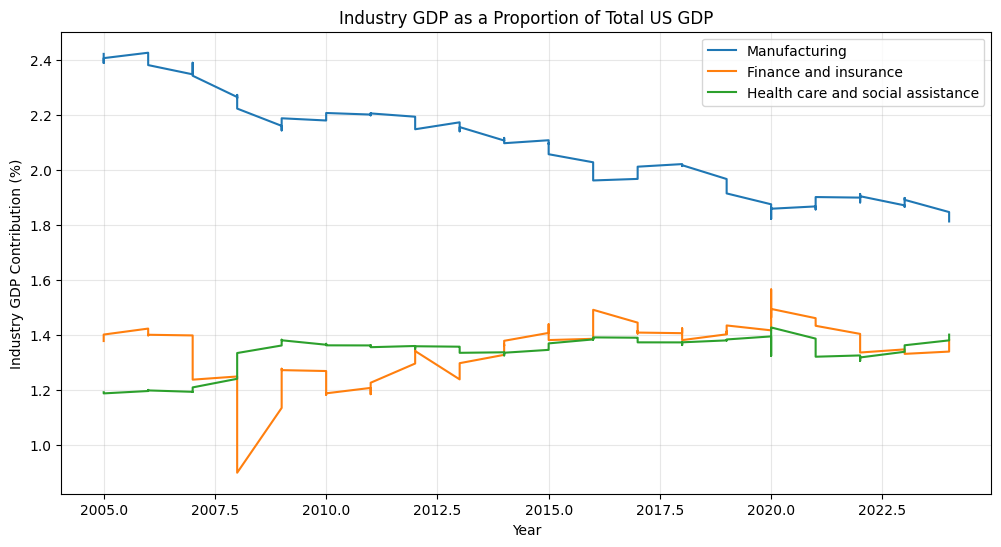

In [ ]:
plt.figure(figsize=(12, 6))
for industry in selected_industries:
    plt.plot(dfSelected.index.get_level_values("Year"), dfSelected[industry], label=industry)  # Use Year index

plt.title("Industry GDP as a Proportion of Total US GDP")
plt.xlabel("Year")
plt.ylabel("Industry GDP Contribution (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Set up Income Data

In [7]:
## This gives available parameters for the NIPA table T20200A
# params['method'] = 'GetParameterList'
# params['DatasetName'] = 'NIPA'
# response = requests.get(url = url, params = params)
# response.json()

In [10]:
params['method'] = 'GetData'
params['DatasetName'] = 'NIPA'
params['Frequency'] = 'Q'
params['Year'] = 'X'
params['TableName'] = 'T20200A'

response = requests.get(url = url, params = params)
apiErrorCheck(response)

API Call: Success


In [ ]:
incomeDf = pd.DataFrame(response.json()['BEAAPI']['Results']['Data']).drop(
    ['TableName', 'SeriesCode', 'LineNumber', 'METRIC_NAME', 'CL_UNIT', 'UNIT_MULT', 'NoteRef']
    , axis = 1
    ).pivot(index = ['TimePeriod'], columns = 'LineDescription', values = 'DataValue')

incomeDf

LineDescription,Distributive industries,Goods-producing industries,Government,Manufacturing,Private industries,Service industries,Wages and salaries
TimePeriod,,,,,,,
1947Q1,"33,833","52,310","17,126","41,213","101,738","15,595","118,864"
1947Q2,"34,341","53,418","17,346","41,957","103,914","16,155","121,260"
1947Q3,"35,785","54,290","17,598","42,321","106,390","16,315","123,988"
1947Q4,"36,913","56,958","17,973","44,353","110,294","16,423","128,267"
1948Q1,"36,652","59,379","18,294","46,128","113,371","17,340","131,665"
...,...,...,...,...,...,...,...
1999Q4,"1,053,772","1,109,577","751,388","800,162","3,832,694","1,669,345","4,584,082"
2000Q1,"1,079,992","1,159,454","765,230","838,663","3,986,264","1,746,819","4,751,494"
2000Q2,"1,093,172","1,147,530","778,562","823,644","4,000,493","1,759,791","4,779,055"


In [ ]:
incomeDf.describe()

LineDescription,Distributive industries,Goods-producing industries,Government,Manufacturing,Private industries,Service industries,Wages and salaries
count,216,216,216,216,216,216,216
unique,216,216,216,216,216,216,216
top,"33,833","52,310","17,126","41,213","101,738","15,595","118,864"
freq,1,1,1,1,1,1,1


## EDA

#### State

In [ ]:
print("=== DATA STRUCTURE ANALYSIS ===")
print(f"Shape: {stateGDPdf.shape}")
print(f"Index type: {type(stateGDPdf.index)}")
print(f"Index name: {stateGDPdf.index.name}")
print(f"\nTime range: {stateGDPdf.index.min()} to {stateGDPdf.index.max()}")
print(f"Number of time periods: {len(stateGDPdf.index)}")
print(f"Number of geographic entities: {len(stateGDPdf.columns)}")

=== DATA STRUCTURE ANALYSIS ===
Shape: (80, 60)
Index type: <class 'pandas.core.indexes.base.Index'>
Index name: TimePeriod

Time range: 2005Q1 to 2024Q4
Number of time periods: 80
Number of geographic entities: 60


In [ ]:
import numpy as np

print("Original data types:")
print(stateGDPdf.dtypes.value_counts())

# Check for non-numeric values
print(f"\nSample of data:")
print(stateGDPdf.iloc[0:2, 0:5])

# Convert all columns to numeric, coercing errors to NaN
for col in stateGDPdf.columns:
    stateGDPdf[col] = pd.to_numeric(stateGDPdf[col], errors='coerce')

print("After cleaning:")
print(stateGDPdf.dtypes.value_counts())

print("\n=== DATA STRUCTURE ANALYSIS ===")
print(f"Shape: {stateGDPdf.shape}")
print(f"Index type: {type(stateGDPdf.index)}")
print(f"Index name: {stateGDPdf.index.name}")
print(f"\nTime range: {stateGDPdf.index.min()} to {stateGDPdf.index.max()}")
print(f"Number of time periods: {len(stateGDPdf.index)}")
print(f"Number of geographic entities: {len(stateGDPdf.columns)}")

Original data types:
object    60
Name: count, dtype: int64

Sample of data:
GeoName      Alabama   Alaska   Arizona  Arkansas California
TimePeriod                                                  
2005Q1      195673.0  44023.9  278000.0  111468.6  2011957.6
2005Q2      197495.8  44542.3  282239.4  111682.8  2029374.2
After cleaning:
float64    60
Name: count, dtype: int64

=== DATA STRUCTURE ANALYSIS ===
Shape: (80, 60)
Index type: <class 'pandas.core.indexes.base.Index'>
Index name: TimePeriod

Time range: 2005Q1 to 2024Q4
Number of time periods: 80
Number of geographic entities: 60


In [ ]:
missing_data = stateGDPdf.isnull().sum()
print(f"\n=== MISSING VALUES AFTER CLEANING ===")
print(f"Total missing values: {stateGDPdf.isnull().sum().sum()}")
if missing_data.sum() > 0:
    print("\nEntities with missing values:")
    print(missing_data[missing_data > 0].sort_values(ascending=False))




=== MISSING VALUES AFTER CLEANING ===
Total missing values: 0


In [ ]:
print(f"\n=== DATA QUALITY CHECKS ===")
print(f"Any infinite values: {np.isinf(stateGDPdf.values).any()}")
print(f"Any negative values: {(stateGDPdf < 0).any().any()}")
print(f"Data range: {stateGDPdf.min().min():.1f} to {stateGDPdf.max().max():.1f}")


=== DATA QUALITY CHECKS ===
Any infinite values: False
Any negative values: False
Data range: 28961.3 to 23542349.0


In [ ]:
# Convert quarterly format to datetime
def quarter_to_date(quarter_str):
    year, quarter = quarter_str.split('Q')
    month = (int(quarter) - 1) * 3 + 1
    return pd.to_datetime(f"{year}-{month:02d}-01")

stateGDPdf.index = pd.to_datetime([quarter_to_date(q) for q in stateGDPdf.index])
stateGDPdf.index.name = 'Date'

print("\nAfter conversion:")
print(stateGDPdf.index[:5])
print(f"Frequency: {pd.infer_freq(stateGDPdf.index)}")


After conversion:
DatetimeIndex(['2005-01-01', '2005-04-01', '2005-07-01', '2005-10-01',
               '2006-01-01'],
              dtype='datetime64[ns]', name='Date', freq=None)
Frequency: QS-OCT


Geographic Entity Classification

In [ ]:
print("=== GEOGRAPHIC ENTITY CLASSIFICATION ===")

# BEA regions
regions = ['Far West', 'Great Lakes', 'Mideast', 'New England', 'Plains',
           'Rocky Mountain', 'Southeast', 'Southwest', 'United States']

# Individual states
states = [col for col in stateGDPdf.columns if col not in regions]

print(f"Regional aggregates ({len(regions)}): {regions}")
print(f"\nIndividual states and territories ({len(states)}):")
print([state for state in states])

# Separate dataframes for different analysis
states_df = stateGDPdf[states].copy()
regions_df = stateGDPdf[regions].copy()
us_total = stateGDPdf[['United States']].copy()

print(f"\nStates DataFrame shape: {states_df.shape}")
print(f"Regions DataFrame shape: {regions_df.shape}")

=== GEOGRAPHIC ENTITY CLASSIFICATION ===
Regional aggregates (9): ['Far West', 'Great Lakes', 'Mideast', 'New England', 'Plains', 'Rocky Mountain', 'Southeast', 'Southwest', 'United States']

Individual states and territories (51):
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

States DataFrame shape: (80, 51)
Regions DataFrame shape: (80, 9)


=== SEASONALITY ANALYSIS ===
US GDP by Quarter (Average across all years):
                mean           std
Quarter                           
1        18754653.10  2.248831e+06
2        18779794.30  2.232509e+06
3        18965146.55  2.315710e+06
4        19082254.55  2.373515e+06


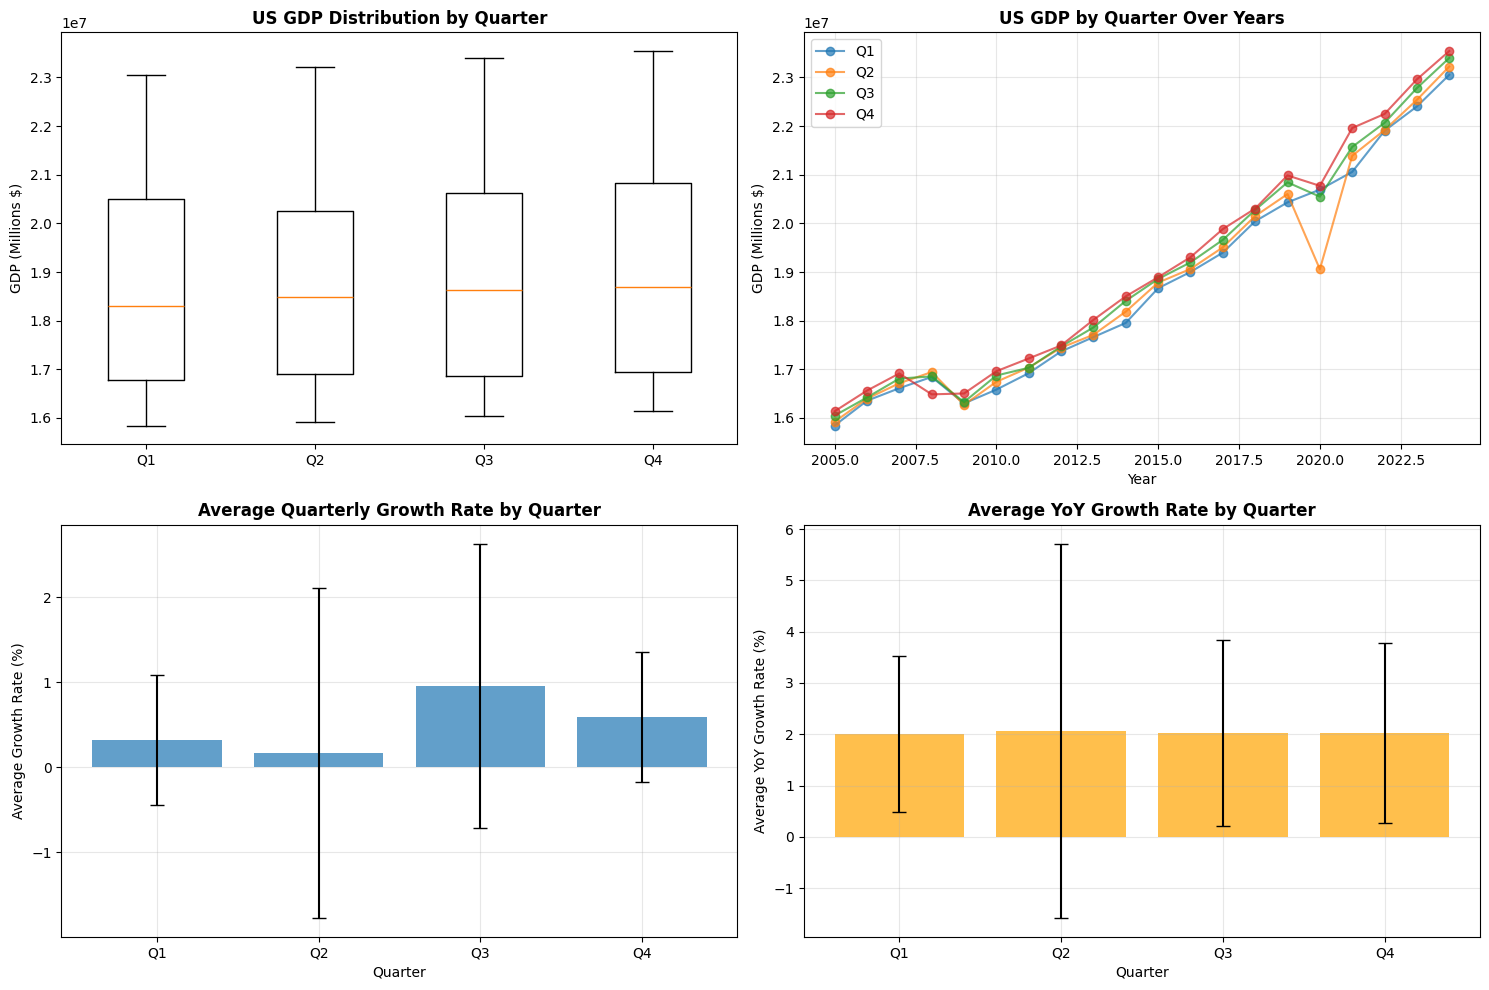

In [ ]:
print("=== SEASONALITY ANALYSIS ===")

stateGDPdf_analysis = stateGDPdf.copy()
stateGDPdf_analysis['Quarter'] = stateGDPdf_analysis.index.quarter
stateGDPdf_analysis['Year'] = stateGDPdf_analysis.index.year

us_seasonal = stateGDPdf_analysis.groupby('Quarter')['United States'].agg(['mean', 'std'])
print("US GDP by Quarter (Average across all years):")
print(us_seasonal)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

ax1 = axes[0, 0]
quarterly_data = [stateGDPdf_analysis[stateGDPdf_analysis['Quarter'] == q]['United States'].values
                  for q in [1, 2, 3, 4]]
ax1.boxplot(quarterly_data, labels=['Q1', 'Q2', 'Q3', 'Q4'])
ax1.set_title('US GDP Distribution by Quarter', fontweight='bold')
ax1.set_ylabel('GDP (Millions $)')

ax2 = axes[0, 1]
for quarter in [1, 2, 3, 4]:
    quarter_data = stateGDPdf_analysis[stateGDPdf_analysis['Quarter'] == quarter]
    ax2.plot(quarter_data['Year'], quarter_data['United States'],
             marker='o', label=f'Q{quarter}', alpha=0.7)
ax2.set_title('US GDP by Quarter Over Years', fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP (Millions $)')
ax2.legend()
ax2.grid(True, alpha=0.3)

ax3 = axes[1, 0]
us_growth = stateGDPdf['United States'].pct_change() * 100
stateGDPdf_analysis['Growth_Rate'] = us_growth
seasonal_growth = stateGDPdf_analysis.groupby('Quarter')['Growth_Rate'].agg(['mean', 'std'])
ax3.bar(range(1, 5), seasonal_growth['mean'], yerr=seasonal_growth['std'],
        alpha=0.7, capsize=5)
ax3.set_title('Average Quarterly Growth Rate by Quarter', fontweight='bold')
ax3.set_xlabel('Quarter')
ax3.set_ylabel('Average Growth Rate (%)')
ax3.set_xticks(range(1, 5))
ax3.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
us_yoy = stateGDPdf['United States'].pct_change(periods=4) * 100
stateGDPdf_analysis['YoY_Growth'] = us_yoy
yoy_seasonal = stateGDPdf_analysis.groupby('Quarter')['YoY_Growth'].agg(['mean', 'std'])
ax4.bar(range(1, 5), yoy_seasonal['mean'], yerr=yoy_seasonal['std'],
        alpha=0.7, capsize=5, color='orange')
ax4.set_title('Average YoY Growth Rate by Quarter', fontweight='bold')
ax4.set_xlabel('Quarter')
ax4.set_ylabel('Average YoY Growth Rate (%)')
ax4.set_xticks(range(1, 5))
ax4.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
states_df.head()

GeoName,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-01,195673.0,44023.9,278000.0,111468.6,2011957.6,261764.0,256267.5,65736.5,108722.3,872048.0,476989.2,71892.1,58327.2,738931.8,303600.9,153328.7,129820.3,179118.2,250227.8,59123.0,319615.5,413546.1,495295.8,299491.4,102595.1,283225.2,38821.2,92727.9,147407.4,68917.4,540897.9,86709.4,1276644.5,440757.4,29633.8,580513.9,139958.9,166901.0,620327.8,54998.2,182154.6,39393.9,286227.3,1145464.0,115626.4,29230.8,435696.1,353656.5,67550.4,279902.3,32438.9
2005-04-01,197495.8,44542.3,282239.4,111682.8,2029374.2,262351.6,257460.7,64145.0,109213.9,877633.4,479548.8,72515.1,59144.2,739052.6,306000.2,153673.2,129763.8,181836.1,252624.8,59462.3,323322.6,414641.1,496170.7,299933.8,102673.2,285138.2,38591.1,93695.0,152044.4,69542.1,544331.1,86828.5,1288086.5,438119.7,29650.0,583627.7,141243.8,166876.3,624301.4,55836.4,182863.4,39091.8,287236.7,1138105.3,117105.1,29132.9,440626.2,357307.6,68443.6,281326.0,33000.3
2005-07-01,196798.5,44267.3,287212.2,112205.9,2056154.2,263133.9,257626.4,63977.3,108840.6,892662.4,480522.6,73179.2,60007.1,743557.6,307860.8,154585.8,130490.5,183252.4,248166.9,59602.2,329217.8,419380.5,491933.7,304936.0,103088.0,285894.4,38743.1,95030.2,150993.3,69893.3,550017.5,85759.8,1310064.5,442871.6,29492.2,587807.9,140760.1,169502.7,629653.9,55942.5,183567.3,39295.1,290621.3,1139410.5,119202.7,29293.9,445933.4,358068.6,67715.8,284557.8,32043.6
2005-10-01,199018.6,44793.8,287773.0,114447.1,2071078.0,260722.2,261460.2,71665.9,108759.5,890314.1,486292.7,74181.1,59849.1,743452.2,307916.5,152919.4,128278.3,183864.8,247224.2,60171.2,330422.1,420734.7,491784.8,302683.7,106410.7,287109.1,39240.5,96770.7,152278.3,69871.8,550184.6,85886.0,1330956.6,447473.9,29740.1,587521.2,139477.6,171657.8,630877.6,56766.6,184484.8,39541.5,292171.7,1150672.5,121786.5,29475.3,446102.5,364552.5,67845.2,282476.6,32369.7
2006-01-01,199142.9,45815.9,292978.3,114544.1,2114085.7,267639.9,270061.6,68092.2,108532.8,902478.3,483793.8,73938.5,60754.4,757875.8,310651.5,154648.7,135170.4,186066.1,249031.9,59870.5,328507.5,423923.8,485281.5,303182.1,104563.0,286626.5,39350.1,95798.7,154678.3,70346.9,551207.6,88052.7,1345654.7,468292.2,30338.2,583452.2,154266.3,176491.5,621047.7,56165.1,186895.2,39813.7,293896.3,1199085.1,124545.0,29657.4,451675.5,368433.6,68642.7,286216.2,34634.2


In [ ]:
regions_df.head()

GeoName,Far West,Great Lakes,Mideast,New England,Plains,Rocky Mountain,Southeast,Southwest,United States
Date,,,,,,,,,
2005-01-01,2794447.1,2398621.1,2933727.9,881853.3,1026518.9,507155.3,3601659.9,1645421.3,15844727.0
2005-04-01,2821001.7,2406568.7,2955189.6,885826.2,1029818.7,510344.0,3622054.2,1643377.0,15922782.0
2005-07-01,2850668.8,2415993.1,2993447.1,891549.2,1038601.1,513191.0,3648802.1,1647713.7,16047587.0
2005-10-01,2876982.2,2413417.7,3024112.7,898217.0,1035850.7,513886.9,3667123.4,1658385.3,16136734.0
2006-01-01,2932042.4,2423558.8,3023673.5,909670.4,1044484.8,526960.8,3710352.2,1729632.0,16353835.0


In [ ]:
us_total.head()

GeoName,United States
Date,
2005-01-01,15844727.0
2005-04-01,15922782.0
2005-07-01,16047587.0
2005-10-01,16136734.0
2006-01-01,16353835.0


## Preprocessing

Total U.S. GDP will be the target variable.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

print(f"US Total: {us_total.shape}")
print(f"Regions: {regions_df.shape}")
print(f"States: {states_df.shape}")

US Total: (80, 1)
Regions: (80, 9)
States: (80, 51)


In [ ]:
print("Date ranges:")
print(f"US Total: {us_total.index.min()} to {us_total.index.max()}")
print(f"Regions: {regions_df.index.min()} to {regions_df.index.max()}")

# Align all datasets to the same date range
common_start = max(us_total.index.min(), regions_df.index.min())
common_end = min(us_total.index.max(), regions_df.index.max())

us_total_aligned = us_total.loc[common_start:common_end].copy()
regions_aligned = regions_df.loc[common_start:common_end].copy()

print(f"\nAligned shapes:")
print(f"US Total: {us_total_aligned.shape}")
print(f"Regions: {regions_aligned.shape}")

Date ranges:
US Total: 2005-01-01 00:00:00 to 2024-10-01 00:00:00
Regions: 2005-01-01 00:00:00 to 2024-10-01 00:00:00

Aligned shapes:
US Total: (80, 1)
Regions: (80, 9)


In [ ]:
# Combine target with features
master_df = pd.concat([
    us_total_aligned.rename(columns={'United States': 'target_gdp'}),
    regions_aligned
], axis=1)

if 'United States' in master_df.columns:
    master_df = master_df.drop('United States', axis=1)

print("Master dataset shape:", master_df.shape)
print("\nColumns:", list(master_df.columns))
print("\nFirst few rows:")
print(master_df.head())

Master dataset shape: (80, 9)

Columns: ['target_gdp', 'Far West', 'Great Lakes', 'Mideast', 'New England', 'Plains', 'Rocky Mountain', 'Southeast', 'Southwest']

First few rows:
GeoName     target_gdp   Far West  Great Lakes    Mideast  New England  \
Date                                                                     
2005-01-01  15844727.0  2794447.1    2398621.1  2933727.9     881853.3   
2005-04-01  15922782.0  2821001.7    2406568.7  2955189.6     885826.2   
2005-07-01  16047587.0  2850668.8    2415993.1  2993447.1     891549.2   
2005-10-01  16136734.0  2876982.2    2413417.7  3024112.7     898217.0   
2006-01-01  16353835.0  2932042.4    2423558.8  3023673.5     909670.4   

GeoName        Plains  Rocky Mountain  Southeast  Southwest  
Date                                                         
2005-01-01  1026518.9        507155.3  3601659.9  1645421.3  
2005-04-01  1029818.7        510344.0  3622054.2  1643377.0  
2005-07-01  1038601.1        513191.0  3648802.1  1647

In [ ]:
master_df.isnull().sum()

,0
GeoName,
target_gdp,0
Far West,0
Great Lakes,0
Mideast,0
New England,0
Plains,0
Rocky Mountain,0
Southeast,0
Southwest,0


In [ ]:
# Drop the first few rows with NaN (caused by lags and YoY calculations)
ml_ready_df = master_df.dropna().copy()

print(f"Rows removed: {master_df.shape[0] - ml_ready_df.shape[0]}")
print(f"Date range: {ml_ready_df.index.min()} to {ml_ready_df.index.max()}")

feature_cols = [col for col in ml_ready_df.columns if col != 'target_gdp']
X = ml_ready_df[feature_cols]
y = ml_ready_df['target_gdp']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Rows removed: 0
Date range: 2005-01-01 00:00:00 to 2024-10-01 00:00:00
Features: (80, 8)
Target: (80,)


## ARIMA

ARIMA uses only univariate target series, not the feature matrix.

In [ ]:
# Use only the target GDP series
arima_series = ml_ready_df['target_gdp']

split_idx = int(len(arima_series) * 0.8)
train_arima = arima_series.iloc[:split_idx]
test_arima = arima_series.iloc[split_idx:]

In [ ]:
import statsmodels.api as sm

# SARIMAX for quarterly data
model = sm.tsa.statespace.SARIMAX(
    train_arima,
    order=(1,1,1),
    seasonal_order=(1,1,1,4),
    enforce_stationarity=False,
    enforce_invertibility=False
)

arima_result = model.fit(disp=False)

forecast_res = arima_result.get_forecast(steps=len(test_arima))
forecast = forecast_res.predicted_mean

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

forecast = forecast.set_axis(test_arima.index)

mae = mean_absolute_error(test_arima, forecast)
rmse = np.sqrt(mean_squared_error(test_arima, forecast))

print(f"Test MAE: {mae:,.0f}")
print(f"Test RMSE: {rmse:,.0f}")

Test MAE: 2,074,931
Test RMSE: 2,254,312


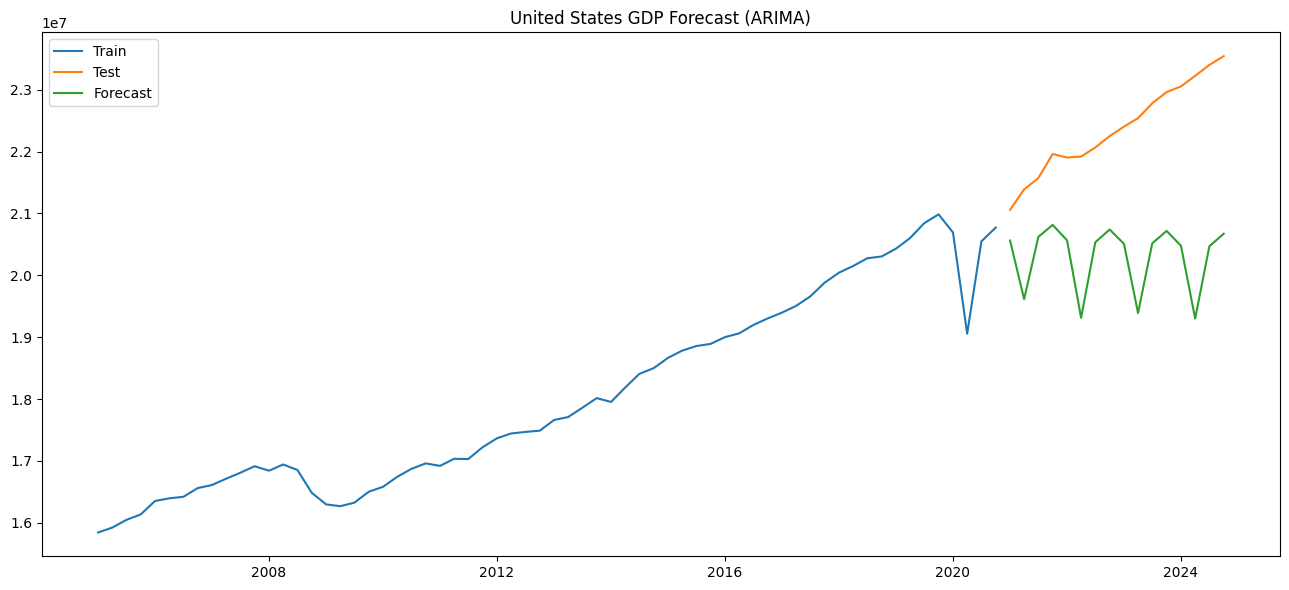

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(train_arima.index, train_arima, label='Train', color='tab:blue')
plt.plot(test_arima.index, test_arima, label='Test', color='tab:orange')
plt.plot(forecast.index, forecast, label='Forecast', color='tab:green')

plt.title("United States GDP Forecast (ARIMA)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
arima_series_full = ml_ready_df['target_gdp']
model_full = sm.tsa.statespace.SARIMAX(
    arima_series_full,
    order=(1,1,1),
    seasonal_order=(1,1,1,4),
    enforce_stationarity=False,
    enforce_invertibility=False
)
arima_result_full = model_full.fit(disp=False)

# Forecast 10 years (40 quarters) ahead
n_forecast = 40
forecast_res_future = arima_result_full.get_forecast(steps=n_forecast)
forecast_future = forecast_res_future.predicted_mean

# Create future date index (quarterly)
last_date = arima_series_full.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), periods=n_forecast, freq='Q')
forecast_future.index = future_dates

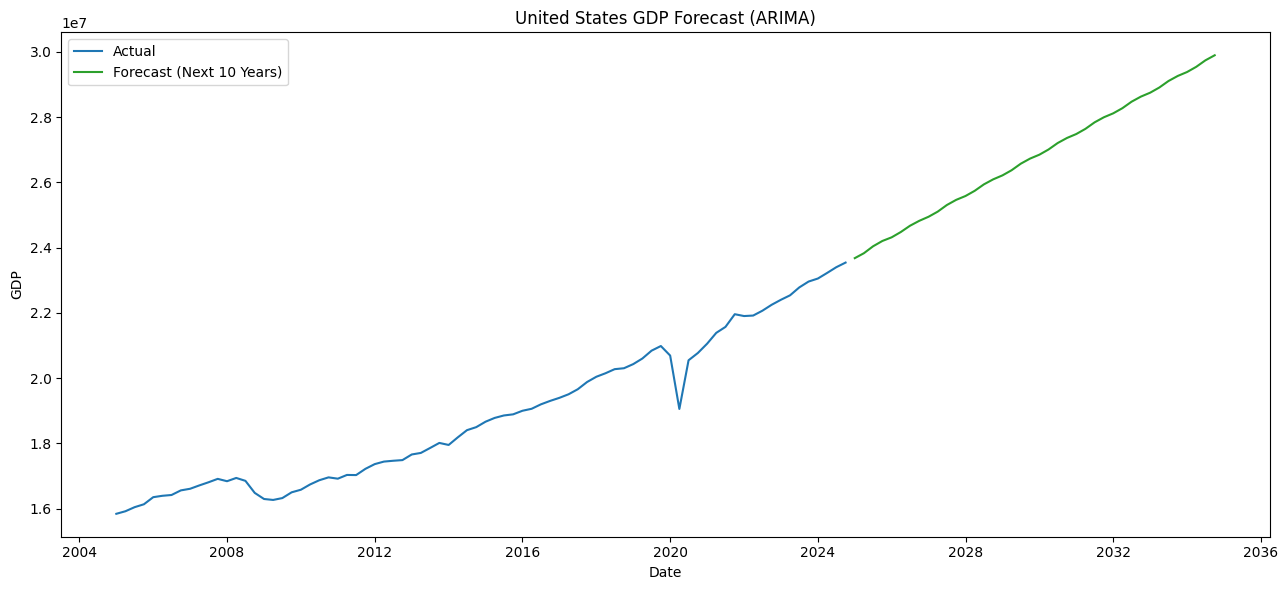

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(arima_series_full.index, arima_series_full, label='Actual', color='tab:blue')
plt.plot(forecast_future.index, forecast_future, label='Forecast (Next 10 Years)', color='tab:green')

plt.title("United States GDP Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("GDP")
plt.legend()
plt.tight_layout()
plt.show()

## Linear Regression

Test MAE: 1,161,962
Test RMSE: 1,214,762
Test R²:  -1.881


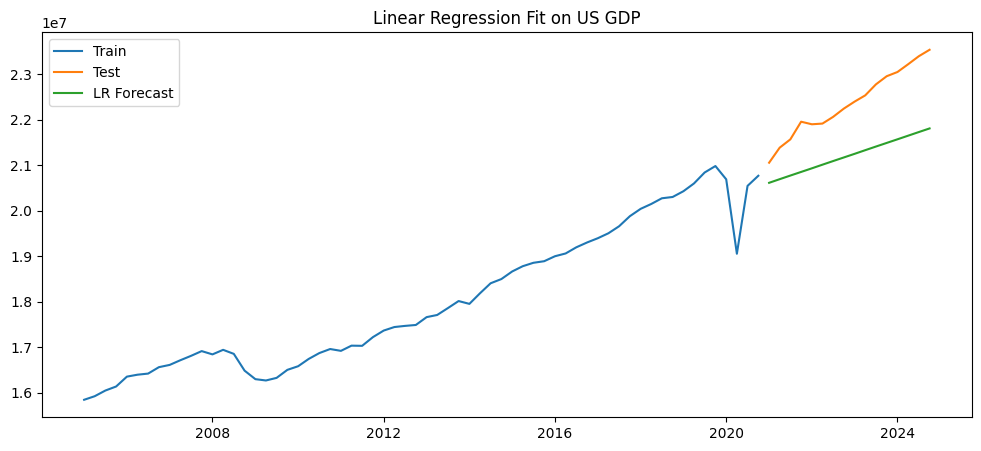

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y = ml_ready_df['target_gdp'].values
t = np.arange(len(y)).reshape(-1,1)

split = int(len(y)*0.8)
t_train, t_test = t[:split], t[split:]
y_train, y_test = y[:split], y[split:]

lr = LinearRegression()
lr.fit(t_train, y_train)

y_pred = lr.predict(t_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2  = r2_score(y_test, y_pred)
print(f"Test MAE: {mae:,.0f}")
print(f"Test RMSE: {rmse:,.0f}")
print(f"Test R²:  {r2:.3f}")

plt.figure(figsize=(12,5))
plt.plot(ml_ready_df.index[:split], y_train, label='Train')
plt.plot(ml_ready_df.index[split:], y_test, label='Test')
plt.plot(ml_ready_df.index[split:], y_pred, label='LR Forecast')
plt.legend()
plt.title("Linear Regression Fit on US GDP")
plt.show()

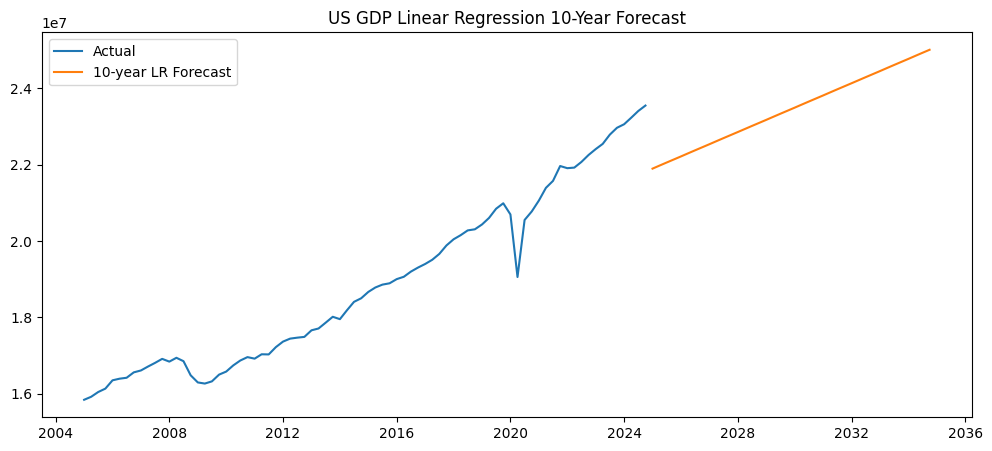

In [ ]:
n_forecast = 40
last_t = t[-1,0]
t_future = np.arange(last_t+1, last_t+1+n_forecast).reshape(-1,1)
y_future = lr.predict(t_future)

last_date = ml_ready_df.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.QuarterEnd(),
                             periods=n_forecast, freq='Q')

plt.figure(figsize=(12,5))
plt.plot(ml_ready_df.index, y, label='Actual')
plt.plot(future_dates, y_future, label='10-year LR Forecast')
plt.legend()
plt.title("US GDP Linear Regression 10-Year Forecast")
plt.show()

## MultiOutput Regression By Industry GDP

In [ ]:
import pandas as pd
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df_reset = dfGDPbyIndustry.reset_index()

# Handle the MultiIndex columns
if isinstance(df_reset.columns, pd.MultiIndex):
    industry_mapping = {}
    new_columns = []

    for col in df_reset.columns:
        if col[0] in ['Year', 'Quarter']:
            new_columns.append(col[0])
        else:
            industry_code = col[0]
            industry_name = col[1] if len(col) > 1 and col[1] else col[0]
            industry_mapping[industry_code] = industry_name
            new_columns.append(industry_code)

    df_reset.columns = new_columns

quarter_map = {'I': 1, 'II': 2, 'III': 3, 'IV': 4}
df_reset['Quarter'] = df_reset['Quarter'].map(quarter_map)
df_reset['Year'] = pd.to_numeric(df_reset['Year'])

time_columns = ['Year', 'Quarter']
all_industry_columns = [col for col in df_reset.columns if col not in time_columns]

# REMOVE GDP and aggregate categories - we only want individual industries
exclude_industries = [
    'GDP',           # Total GDP (sum of all industries)
    'PVT',           # Private industries (aggregate)
    'PSERV',         # Private services (aggregate)
    'PGOOD',         # Private goods (aggregate)
    'PROF',          # Professional services (aggregate)
    'G',             # Government (aggregate)
    'FIRE',          # Finance group (aggregate)
    'HS',            # Housing (aggregate)
    'GSL',           # State and local government (aggregate)
    'GSLG',          # State and local general government (aggregate)
    'GSLE',          # State and local enterprises (aggregate)
    'GF',            # Federal government (aggregate)
    'GFE',           # Government enterprises (aggregate)
    'GFGD',          # National defense (aggregate)
    'GFGN',          # Nondefense (aggregate)
    'ORE'            # Other real estate (aggregate)
]

industry_columns = [col for col in all_industry_columns if col not in exclude_industries]

print(f"Total columns after removing aggregates: {len(industry_columns)}")
print(f"Removed aggregate categories: {exclude_industries}")

for col in industry_columns:
    df_reset[col] = pd.to_numeric(df_reset[col], errors='coerce')

df_reset = df_reset.fillna(method='ffill')

print(f"\nWorking with {len(industry_columns)} individual industries")
print("Sample industry columns:")
for i, col in enumerate(industry_columns[:10]):
    industry_name = industry_mapping.get(col, col)
    print(f"  {col}: {industry_name}")

def create_features_and_targets(df, time_cols, industry_cols, lag_periods=4):
    features = []
    targets = []

    for i in range(lag_periods, len(df)):
        current_time = df.iloc[i][time_cols].values.astype(float)

        lagged_values = []
        for lag in range(1, lag_periods + 1):
            lagged_values.extend(df.iloc[i - lag][industry_cols].values.astype(float))

        feature_row = np.concatenate([current_time, lagged_values])
        features.append(feature_row)
        targets.append(df.iloc[i][industry_cols].values.astype(float))

    return np.array(features), np.array(targets)

X, y = create_features_and_targets(df_reset, time_columns, industry_columns, lag_periods=4)

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target matrix shape: {y.shape}")

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("\nTraining MultiOutputRegressor...")
multi_output_model = MultiOutputRegressor(
    RandomForestRegressor(
        n_estimators=50,
        random_state=42,
        n_jobs=-1,
        max_depth=8,
        min_samples_split=5
    )
)

multi_output_model.fit(X_train, y_train)
print("Model training complete!")

def forecast_future(model, df, time_cols, industry_cols, periods=40):
    forecasts = []
    last_year = int(df.iloc[-1]['Year'])
    last_quarter = int(df.iloc[-1]['Quarter'])
    recent_data = df.tail(4)[industry_cols].values.astype(float)

    for period in range(periods):
        if last_quarter == 4:
            next_year = last_year + 1
            next_quarter = 1
        else:
            next_year = last_year
            next_quarter = last_quarter + 1

        time_features = np.array([next_year, next_quarter], dtype=float)
        lagged_values = recent_data.flatten()
        feature_row = np.concatenate([time_features, lagged_values]).reshape(1, -1)

        prediction = model.predict(feature_row)[0]
        forecasts.append(prediction)
        recent_data = np.vstack([recent_data[1:], prediction])

        last_year = next_year
        last_quarter = next_quarter

    return np.array(forecasts)

print("\nGenerating 10-year forecast...")
future_predictions = forecast_future(multi_output_model, df_reset, time_columns, industry_columns, periods=40)

avg_predictions = np.mean(future_predictions, axis=0)
recent_avg = np.mean(df_reset.tail(8)[industry_columns].values.astype(float), axis=0)
growth_rate = ((avg_predictions - recent_avg) / recent_avg) * 100

ranking_df = pd.DataFrame({
    'Industry_Code': industry_columns,
    'Industry_Name': [industry_mapping.get(col, col) for col in industry_columns],
    'Current_GDP_Avg': recent_avg,
    'Future_GDP_Avg': avg_predictions,
    'Growth_Rate_%': growth_rate
})

ranking_df = ranking_df.sort_values('Future_GDP_Avg', ascending=False)

print("\n" + "="*100)
print("TOP 15 INDUSTRIES - 10 YEAR GDP FORECAST RANKING (Individual Industries Only)")
print("="*100)
print(f"{'Rank':<4} {'Current GDP':<12} {'Future GDP':<12} {'Growth %':<10} {'Industry Name':<50}")
print("-" * 100)

for i, (_, row) in enumerate(ranking_df.head(15).iterrows()):
    print(f"{i+1:<4} ${row['Current_GDP_Avg']:<11.1f} ${row['Future_GDP_Avg']:<11.1f} {row['Growth_Rate_%']:<9.1f} {row['Industry_Name']:<50}")

print("\n" + "="*100)
print("TOP 15 INDUSTRIES BY GROWTH RATE")
print("="*100)
ranking_by_growth = ranking_df.sort_values('Growth_Rate_%', ascending=False)
print(f"{'Rank':<4} {'Current GDP':<12} {'Future GDP':<12} {'Growth %':<10} {'Industry Name':<50}")
print("-" * 100)

for i, (_, row) in enumerate(ranking_by_growth.head(15).iterrows()):
    print(f"{i+1:<4} ${row['Current_GDP_Avg']:<11.1f} ${row['Future_GDP_Avg']:<11.1f} {row['Growth_Rate_%']:<9.1f} {row['Industry_Name']:<50}")

Total columns after removing aggregates: 83
Removed aggregate categories: ['GDP', 'PVT', 'PSERV', 'PGOOD', 'PROF', 'G', 'FIRE', 'HS', 'GSL', 'GSLG', 'GSLE', 'GF', 'GFE', 'GFGD', 'GFGN', 'ORE']

Working with 83 individual industries
Sample industry columns:
  11: Agriculture, forestry, fishing, and hunting
  111CA: Farms
  113FF: Forestry, fishing, and related activities
  21: Mining
  211: Oil and gas extraction
  212: Mining, except oil and gas
  213: Support activities for mining
  22: Utilities
  23: Construction
  311FT: Food and beverage and tobacco products

Feature matrix shape: (76, 334)
Target matrix shape: (76, 83)

Training MultiOutputRegressor...
Model training complete!

Generating 10-year forecast...

TOP 15 INDUSTRIES - 10 YEAR GDP FORECAST RANKING (Individual Industries Only)
Rank Current GDP  Future GDP   Growth %   Industry Name                                     
----------------------------------------------------------------------------------------------------
1  

## ARIMA 10 Forecast By Industry

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

df_reset = dfGDPbyIndustry.reset_index()

print("Original dataframe info:")
print(f"Shape: {df_reset.shape}")
print(f"Columns type: {type(df_reset.columns)}")

if isinstance(df_reset.columns, pd.MultiIndex):
    print("Handling MultiIndex columns...")

    industry_mapping = {}
    new_columns = []

    for col in df_reset.columns:
        if col[0] in ['Year', 'Quarter']:
            new_columns.append(col[0])
        else:
            industry_code = col[0]
            industry_name = col[1] if len(col) > 1 and col[1] else col[0]
            industry_mapping[industry_code] = industry_name
            new_columns.append(industry_code)

    df_reset.columns = new_columns
    print(f"Flattened columns: {list(df_reset.columns)[:10]}...")

quarter_map = {'I': 1, 'II': 2, 'III': 3, 'IV': 4}
df_reset['Quarter'] = df_reset['Quarter'].map(quarter_map)
df_reset['Year'] = pd.to_numeric(df_reset['Year'], errors='coerce')

print(f"Year dtype: {df_reset['Year'].dtype}")
print(f"Quarter dtype: {df_reset['Quarter'].dtype}")

exclude_industries = [
    'GDP', 'PVT', 'PSERV', 'PGOOD', 'PROF', 'G', 'FIRE', 'HS',
    'GSL', 'GSLG', 'GSLE', 'GF', 'GFE', 'GFGD', 'GFGN', 'ORE'
]

time_columns = ['Year', 'Quarter']
all_industry_columns = [col for col in df_reset.columns if col not in time_columns]
industry_columns = [col for col in all_industry_columns if col not in exclude_industries]

print(f"\nNumber of industries to process: {len(industry_columns)}")

print("Converting industry data to numeric...")
for col in industry_columns:
    print(f"Converting {col}...")
    print(f"  Original dtype: {df_reset[col].dtype}")
    print(f"  Sample values: {df_reset[col].head(3).tolist()}")

    df_reset[col] = pd.to_numeric(df_reset[col], errors='coerce')
    print(f"  New dtype: {df_reset[col].dtype}")

    nan_count = df_reset[col].isna().sum()
    if nan_count > 0:
        print(f"  {nan_count} NaN values found")
        df_reset[col] = df_reset[col].fillna(method='ffill')
        df_reset[col] = df_reset[col].fillna(method='bfill')

print(f"\nData type verification:")
for col in industry_columns[:5]:
    print(f"{col}: {df_reset[col].dtype} - All numeric: {pd.api.types.is_numeric_dtype(df_reset[col])}")

def find_best_arima_order(ts_data, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = (1, 1, 1)

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(ts_data, order=(p, d, q))
                    fitted_model = model.fit()
                    aic = fitted_model.aic

                    if aic < best_aic:
                        best_aic = aic
                        best_order = (p, d, q)
                except:
                    continue

    return best_order, best_aic

def train_arima_and_forecast(ts_data, industry_name, periods=40):
    try:
        clean_data = ts_data.dropna()

        if len(clean_data) < 10:
            print(f"⚠️  {industry_name}: Not enough data points ({len(clean_data)})")
            return None

        if not pd.api.types.is_numeric_dtype(clean_data):
            print(f"❌ {industry_name}: Data is not numeric - {clean_data.dtype}")
            return None

        if not np.all(np.isfinite(clean_data)):
            print(f"{industry_name}: Non-finite values detected, cleaning...")
            clean_data = clean_data[np.isfinite(clean_data)]

        if len(clean_data) < 10:
            print(f"❌ {industry_name}: Not enough clean data points ({len(clean_data)})")
            return None

        best_order, best_aic = find_best_arima_order(clean_data)

        model = ARIMA(clean_data, order=best_order)
        fitted_model = model.fit()

        forecast = fitted_model.forecast(steps=periods)

        recent_avg = clean_data.tail(8).mean()
        forecast_avg = forecast.mean()
        growth_rate = ((forecast_avg - recent_avg) / recent_avg) * 100

        print(f"✅ {industry_name}: ARIMA{best_order}, AIC={best_aic:.1f}, Growth={growth_rate:.1f}%")

        return {
            'industry': industry_name,
            'industry_code': None,
            'arima_order': best_order,
            'aic': best_aic,
            'recent_avg': recent_avg,
            'forecast_avg': forecast_avg,
            'growth_rate': growth_rate,
            'forecast': forecast.tolist(),
            'fitted_model': fitted_model
        }

    except Exception as e:
        print(f"❌ {industry_name}: Failed - {str(e)}")
        return None

print("\n" + "="*80)
print("TRAINING INDIVIDUAL ARIMA MODELS FOR EACH INDUSTRY")
print("="*80)

arima_results = []
successful_count = 0

for industry_code in industry_columns:
    industry_name = industry_mapping.get(industry_code, industry_code)

    ts_data = df_reset[industry_code]

    print(f"\nProcessing {industry_name}:")
    print(f"  Data type: {ts_data.dtype}")
    print(f"  Data shape: {ts_data.shape}")
    print(f"  Sample values: {ts_data.head(3).tolist()}")

    result = train_arima_and_forecast(ts_data, industry_name, periods=40)

    if result is not None:
        result['industry_code'] = industry_code
        arima_results.append(result)
        successful_count += 1

print(f"\n✅ Successfully trained {successful_count} ARIMA models")
print(f"❌ Failed to train {len(industry_columns) - successful_count} models")

if successful_count == 0:
    print("\n❌ No ARIMA models were successfully trained!")
    print("Let's debug the first few industries:")

    for i, industry_code in enumerate(industry_columns[:3]):
        print(f"\nDEBUG Industry {i+1}: {industry_code}")
        data = df_reset[industry_code]
        print(f"  Raw data: {data.values}")
        print(f"  Data type: {data.dtype}")
        print(f"  Is numeric: {pd.api.types.is_numeric_dtype(data)}")
        print(f"  Has NaN: {data.isna().any()}")
        print(f"  Min/Max: {data.min()} / {data.max()}")
else:
    arima_ranking_df = pd.DataFrame(arima_results)

    ranking_by_future_value = arima_ranking_df.sort_values('forecast_avg', ascending=False)
    ranking_by_growth = arima_ranking_df.sort_values('growth_rate', ascending=False)

    print("\n" + "="*100)
    print("TOP 15 INDUSTRIES - ARIMA FORECAST RANKING (by Future GDP Value)")
    print("="*100)
    print(f"{'Rank':<4} {'Current GDP':<12} {'Future GDP':<12} {'Growth %':<10} {'ARIMA Order':<12} {'Industry Name':<50}")
    print("-" * 100)

    for i, (_, row) in enumerate(ranking_by_future_value.head(15).iterrows()):
        print(f"{i+1:<4} ${row['recent_avg']:<11.1f} ${row['forecast_avg']:<11.1f} {row['growth_rate']:<9.1f} {str(row['arima_order']):<12} {row['industry']:<50}")

    print("\n" + "="*100)
    print("TOP 15 INDUSTRIES - ARIMA RANKING (by Growth Rate)")
    print("="*100)
    print(f"{'Rank':<4} {'Current GDP':<12} {'Future GDP':<12} {'Growth %':<10} {'ARIMA Order':<12} {'Industry Name':<50}")
    print("-" * 100)

    for i, (_, row) in enumerate(ranking_by_growth.head(15).iterrows()):
        print(f"{i+1:<4} ${row['recent_avg']:<11.1f} ${row['forecast_avg']:<11.1f} {row['growth_rate']:<9.1f} {str(row['arima_order']):<12} {row['industry']:<50}")

    print(f"\n" + "="*60)
    print("ARIMA FORECASTING SUMMARY")
    print("="*60)
    print(f"Industries successfully modeled: {len(arima_results)}")
    print(f"Average growth rate: {arima_ranking_df['growth_rate'].mean():.1f}%")
    print(f"Median growth rate: {arima_ranking_df['growth_rate'].median():.1f}%")
    print(f"Industries with positive growth: {(arima_ranking_df['growth_rate'] > 0).sum()}")
    print(f"Industries with negative growth: {(arima_ranking_df['growth_rate'] < 0).sum()}")

Original dataframe info:
Shape: (80, 101)
Columns type: <class 'pandas.core.indexes.multi.MultiIndex'>
Handling MultiIndex columns...
Flattened columns: ['Year', 'Quarter', '11', '111CA', '113FF', '21', '211', '212', '213', '22']...
Year dtype: int64
Quarter dtype: int64

Number of industries to process: 83
Converting industry data to numeric...
Converting 11...
  Original dtype: float64
  Sample values: [131.7, 132.1, 130.1]
  New dtype: float64
Converting 111CA...
  Original dtype: float64
  Sample values: [108.2, 108.6, 106.3]
  New dtype: float64
Converting 113FF...
  Original dtype: float64
  Sample values: [23.5, 23.5, 23.8]
  New dtype: float64
Converting 21...
  Original dtype: float64
  Sample values: [196.4, 210.1, 232.5]
  New dtype: float64
Converting 211...
  Original dtype: float64
  Sample values: [133.0, 143.5, 160.5]
  New dtype: float64
Converting 212...
  Original dtype: float64
  Sample values: [39.8, 42.0, 44.1]
  New dtype: float64
Converting 213...
  Original dty

### Industry GDP Forecast Rankings (5 & 10 yr) Visualizations

In [ ]:
print(arima_ranking_df.columns)

Index(['industry', 'industry_code', 'arima_order', 'aic', 'recent_avg',
       'forecast_avg', 'growth_rate', 'forecast', 'fitted_model'],
      dtype='object')


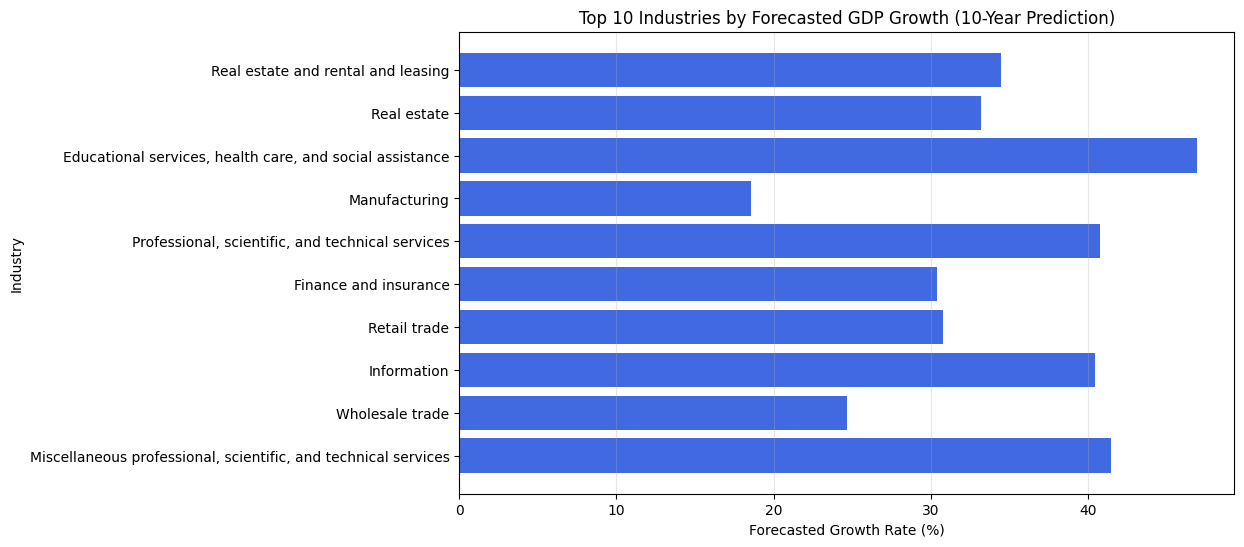

In [ ]:
import matplotlib.pyplot as plt

# Select top 10 industries by forecasted GDP growth
top_industries = arima_ranking_df.sort_values('forecast_avg', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_industries['industry'], top_industries['growth_rate'], color='royalblue')
plt.xlabel("Forecasted Growth Rate (%)")
plt.ylabel("Industry")
plt.title("Top 10 Industries by Forecasted GDP Growth (10-Year Prediction)")
plt.gca().invert_yaxis()  # Invert for best readability
plt.grid(axis="x", alpha=0.3)
plt.show()

### Forecasted GDP Growth Over Time ###

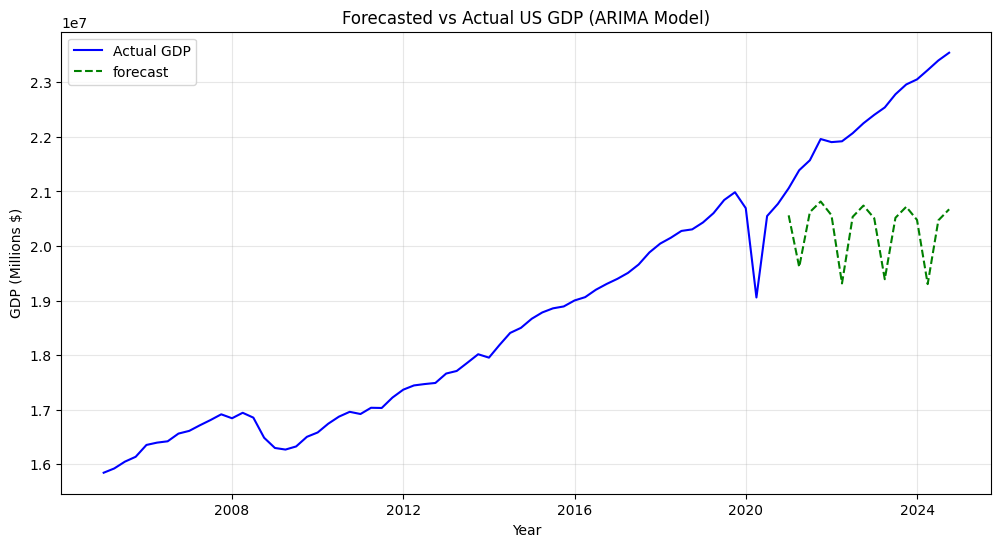

In [ ]:
plt.figure(figsize=(12, 6))

# Plot actual GDP
plt.plot(arima_series_full.index, arima_series_full, label="Actual GDP", color="blue")

# Plot forecasted GDP (10-year projection)
plt.plot(forecast.index, forecast, label="forecast", color="green", linestyle="--")

plt.title("Forecasted vs Actual US GDP (ARIMA Model)")
plt.xlabel("Year")
plt.ylabel("GDP (Millions $)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Industry-Wise Forecast Trends ###

In [ ]:
# Flatten MultiIndex if needed
arima_ranking_df.columns = ['_'.join(map(str, col)) if isinstance(col, tuple) else col for col in arima_ranking_df.columns]

In [ ]:
# Expand the forecast column so each value has its own row
forecast_df = arima_ranking_df[["industry", "forecast"]].explode("forecast")  # Expand lists into separate rows

In [ ]:
years = list(range(2025, 2025 + forecast_df.groupby("industry")["forecast"].count().max()))
forecast_df["Year"] = years * (len(forecast_df) // len(years))  # Repeat years to match row count

In [ ]:
print(forecast_df.head())  # Confirm Year column is correct

                                      industry    forecast  Year
0  Agriculture, forestry, fishing, and hunting   265.22255  2025
0  Agriculture, forestry, fishing, and hunting  267.302949  2026
0  Agriculture, forestry, fishing, and hunting  268.639549  2027
0  Agriculture, forestry, fishing, and hunting  270.553731  2028
0  Agriculture, forestry, fishing, and hunting  272.019403  2029


In [ ]:
forecast_df["forecast"] = pd.to_numeric(forecast_df["forecast"], errors="coerce")

In [ ]:
# Sort industries by highest forecasted GDP
top_industries = forecast_df.groupby("industry")["forecast"].mean().nlargest(10).index

# Filter dataset to only include top industries
filtered_df = forecast_df[forecast_df["industry"].isin(top_industries)]

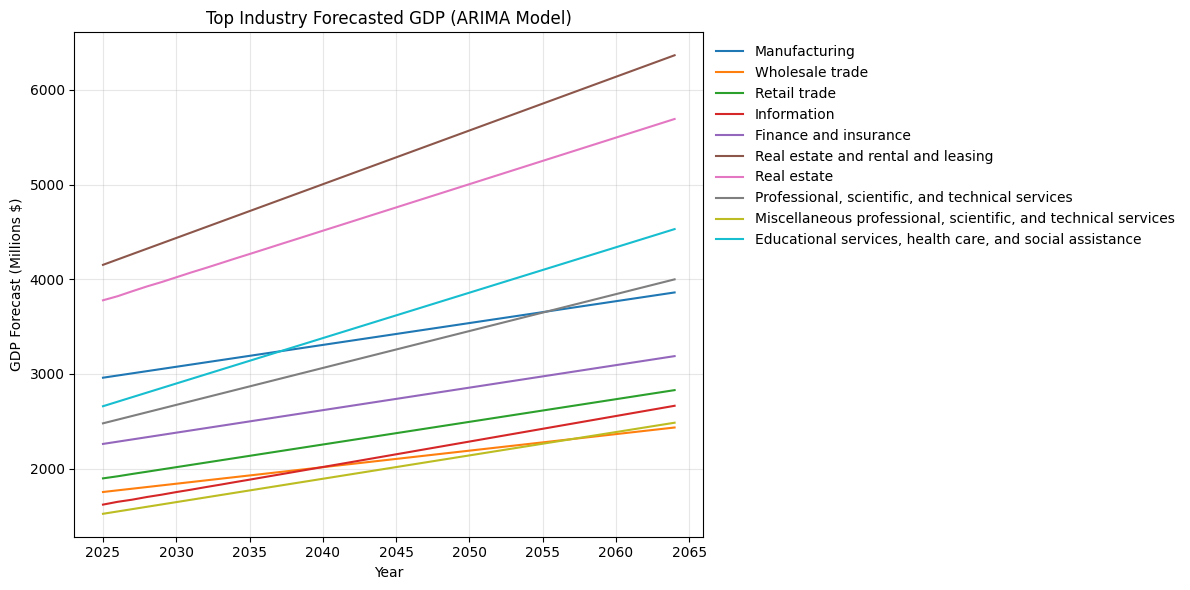

In [ ]:
plt.figure(figsize=(12, 6))

# Plot forecasts for top industries
for industry in filtered_df["industry"].unique():
    industry_data = filtered_df[filtered_df["industry"] == industry]
    plt.plot(industry_data["Year"], industry_data["forecast"], label=industry)

plt.title("Top Industry Forecasted GDP (ARIMA Model)")
plt.xlabel("Year")
plt.ylabel("GDP Forecast (Millions $)")
plt.grid(alpha=0.3)

# Move legend to the right outside the plot area
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10, frameon=False)

plt.tight_layout()
plt.show()

## Heatmap of Growth Rates Across Industries ##

In [ ]:
forecast_df.set_index("Year", inplace=True)
print(forecast_df.index)  # Should now display years

Index([2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034,
       ...
       2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064],
      dtype='int64', name='Year', length=3320)


In [ ]:
if isinstance(forecast_df.columns, pd.MultiIndex):
    forecast_df.columns = forecast_df.columns.get_level_values(0)  # Flatten column index

In [ ]:
sector_mapping = {
    "Agriculture, forestry, fishing, and hunting": "Agriculture",
    "Farms": "Agriculture",
    "Manufacturing": "Manufacturing",
    "Retail trade": "Retail",
    "Transportation and warehousing": "Transportation",
    "Finance and insurance": "Finance",
    "Health care and social assistance": "Healthcare",
}

forecast_df["sector"] = forecast_df["industry"].map(sector_mapping).fillna("Other")

# Aggregate forecasts by sector
sector_forecast = forecast_df.groupby(["Year", "sector"])["forecast"].sum().reset_index()

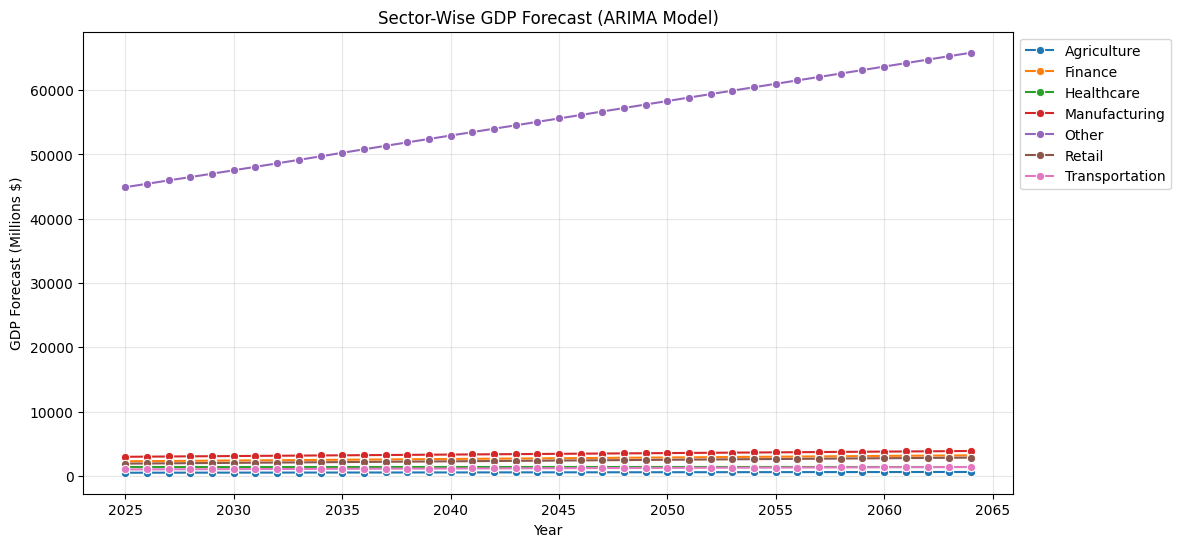

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=sector_forecast, x="Year", y="forecast", hue="sector", marker="o")

plt.title("Sector-Wise GDP Forecast (ARIMA Model)")
plt.xlabel("Year")
plt.ylabel("GDP Forecast (Millions $)")
plt.grid(alpha=0.3)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

## Identify High-Growth vs. Declining Sector ##

In [ ]:
forecast_df["sector"] = forecast_df["industry"].map(sector_mapping).fillna("Other")

In [ ]:
sector_forecast["growth_rate"] = sector_forecast.groupby("sector")["forecast"].pct_change()

In [ ]:
sector_growth = sector_forecast.dropna(subset=["growth_rate"]).reset_index(drop=True)

In [ ]:
print(sector_growth.columns)  # Confirm expected columns
print(sector_growth.head())  # Verify data integrity

Index(['Year', 'sector', 'forecast', 'growth_rate'], dtype='object')
   Year         sector      forecast  growth_rate
0  2026    Agriculture    484.789061     0.008318
1  2026        Finance   2284.655200     0.010517
2  2026     Healthcare   1396.494471     0.000000
3  2026  Manufacturing   2983.370307     0.007798
4  2026          Other  45436.685643     0.011574


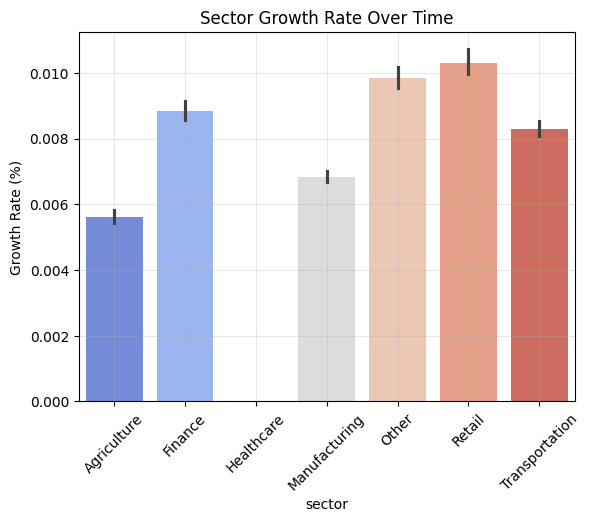

In [ ]:
sns.barplot(data=sector_growth, x="sector", y="growth_rate", palette="coolwarm")
plt.title("Sector Growth Rate Over Time")
plt.xticks(rotation=45)
plt.ylabel("Growth Rate (%)")
plt.grid(alpha=0.3)
plt.show()

## Forecast Error and Residual Plot ##

In [ ]:
print(arima_ranking_df.columns)  # Ensure "growth_rate" is present
print(arima_ranking_df["growth_rate"].dtype)  # Check its data type
print(arima_ranking_df["growth_rate"].head())  # Preview sample values

Index(['industry', 'industry_code', 'arima_order', 'aic', 'recent_avg',
       'forecast_avg', 'growth_rate', 'forecast', 'fitted_model'],
      dtype='object')
float64
0    14.001879
1    14.796682
2    10.413067
3     4.176230
4     0.919186
Name: growth_rate, dtype: float64


In [ ]:
arima_ranking_df = arima_ranking_df.dropna(subset=["growth_rate"])

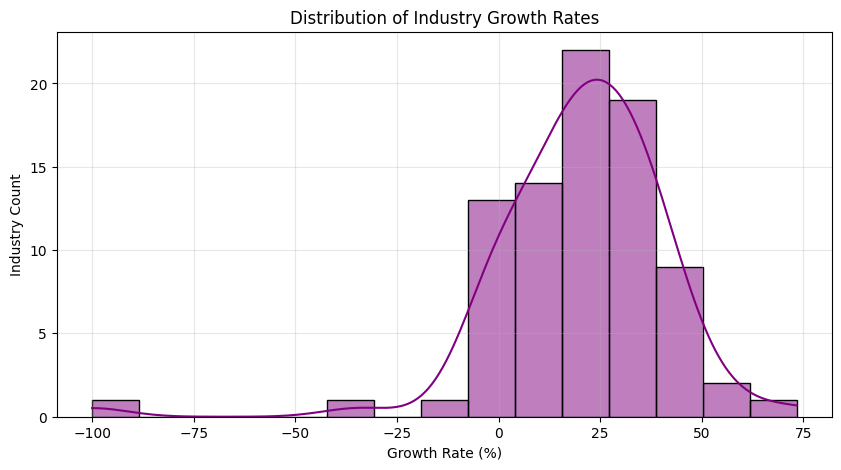

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(arima_ranking_df["growth_rate"], bins=15, kde=True, color="purple")

plt.title("Distribution of Industry Growth Rates")
plt.xlabel("Growth Rate (%)")
plt.ylabel("Industry Count")
plt.grid(alpha=0.3)
plt.show()

## High-Growth Industries (Long-Term Investment) ##

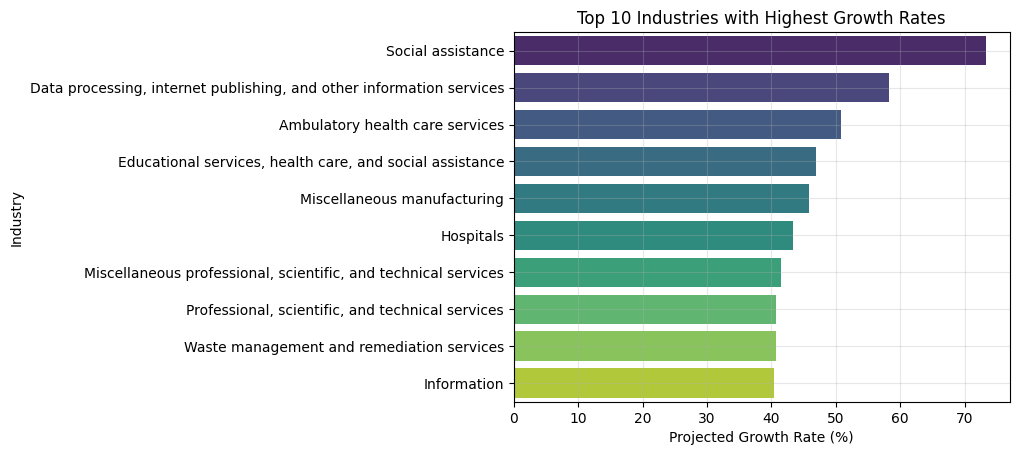

In [ ]:
sns.barplot(data=top_growth_industries, y="industry", x="growth_rate", palette="viridis")

plt.title("Top 10 Industries with Highest Growth Rates")
plt.ylabel("Industry")
plt.xlabel("Projected Growth Rate (%)")
plt.grid(alpha=0.3)
plt.show()

## Stability vs. Volatility ##

In [ ]:
print(arima_ranking_df["growth_rate"].describe())  # Check if values exist
print(arima_ranking_df["growth_rate"].isna().sum())  # Count missing values

count    83.000000
mean     22.023914
std      15.667575
min       0.000000
25%      10.690305
50%      22.410745
75%      33.192537
max      73.336357
Name: growth_rate, dtype: float64
0


In [ ]:
arima_ranking_df["industry_short"] = arima_ranking_df["industry"].apply(lambda x: x[:20] + "..." if len(x) > 20 else x)

In [ ]:
stable_industries = (
    arima_ranking_df.groupby("industry_short")["growth_rate"]
    .mean()
    .sort_values(ascending=False)
    .iloc[:10]
    .index
)

print("Stable:\n", stable_industries)

Stable:
 Index(['Social assistance', 'Data processing, int...',
       'Ambulatory health ca...', 'Educational services...',
       'Miscellaneous manufa...', 'Hospitals', 'Miscellaneous profes...',
       'Professional, scient...', 'Waste management and...', 'Information'],
      dtype='object', name='industry_short')


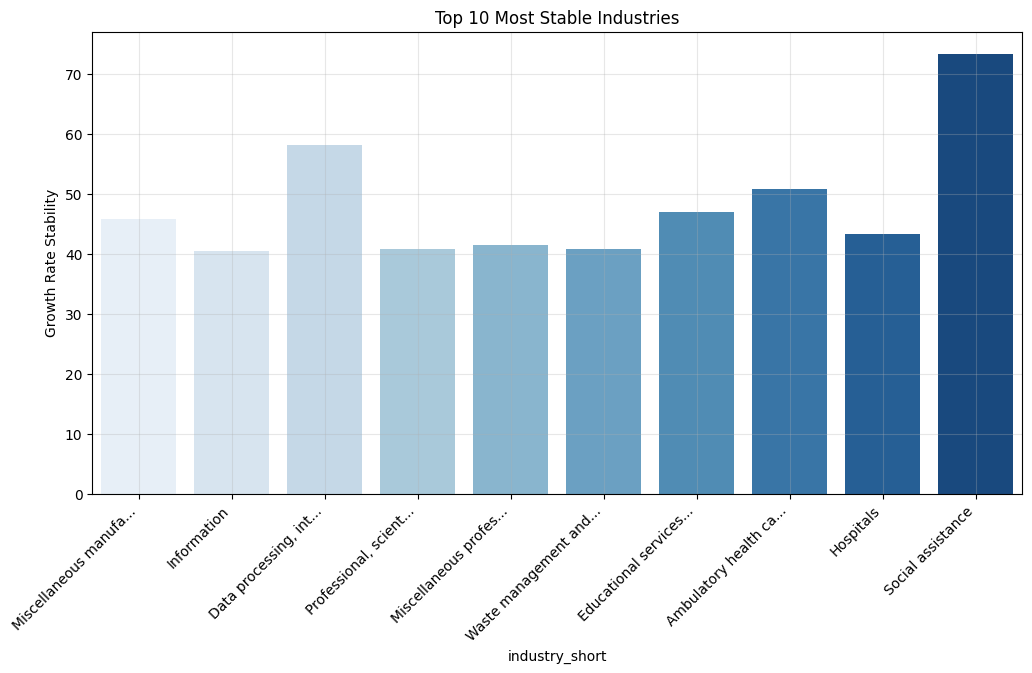

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=arima_ranking_df[arima_ranking_df["industry_short"].isin(stable_industries)],
            x="industry_short", y="growth_rate", palette="Blues")

plt.title("Top 10 Most Stable Industries")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Growth Rate Stability")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
volatile_industries = (
    arima_ranking_df.groupby("industry")["growth_rate"]
    .std()
    .sort_values(ascending=False)  # Sort by highest fluctuations
    .iloc[:10]  # Select top 10 most volatile industries
    .index
)

Volatile Industries:
 Index(['Accommodation', 'Accommodation and food services',
       'Administrative and support services',
       'Administrative and waste management services',
       'Agriculture, forestry, fishing, and hunting', 'Air transportation',
       'Ambulatory health care services',
       'Amusements, gambling, and recreation industries',
       'Apparel and leather and allied products',
       'Arts, entertainment, and recreation'],
      dtype='object', name='industry')


In [ ]:
volatile_industries = (
    arima_ranking_df.groupby("industry_short")["growth_rate"]
    .std()
    .sort_values(ascending=False)
    .iloc[:10]
    .index
)

print("Volatile:\n", volatile_industries)

Volatile:
 Index(['Other transportation...', 'Arts, entertainment,...', 'Accommodation',
       'Accommodation and fo...', 'Administrative and s...',
       'Administrative and w...', 'Agriculture, forestr...',
       'Air transportation', 'Ambulatory health ca...',
       'Amusements, gambling...'],
      dtype='object', name='industry_short')


In [ ]:
arima_ranking_df["stability_category"] = "Other"  # Default category
arima_ranking_df.loc[arima_ranking_df["industry"].isin(stable_industries), "stability_category"] = "Stable"
arima_ranking_df.loc[arima_ranking_df["industry"].isin(volatile_industries), "stability_category"] = "Volatile"

In [ ]:
print(arima_ranking_df[arima_ranking_df["stability_category"] == "Stable"]["industry"].unique())
print(arima_ranking_df[arima_ranking_df["stability_category"] == "Volatile"]["industry"].unique())

['Support activities for mining' 'Petroleum and coal products'
 'Plastics and rubber products' 'Primary metals' 'Rail transportation'
 'Water transportation' 'Securities, commodity contracts, and investments'
 'Legal services' 'Health care and social assistance']
['Agriculture, forestry, fishing, and hunting'
 'Apparel and leather and allied products' 'Air transportation'
 'Administrative and waste management services'
 'Administrative and support services' 'Ambulatory health care services'
 'Arts, entertainment, and recreation'
 'Amusements, gambling, and recreation industries'
 'Accommodation and food services' 'Accommodation']


In [ ]:
filtered_df = arima_ranking_df[arima_ranking_df["industry"].isin(stable_industries) | arima_ranking_df["industry"].isin(volatile_industries)]

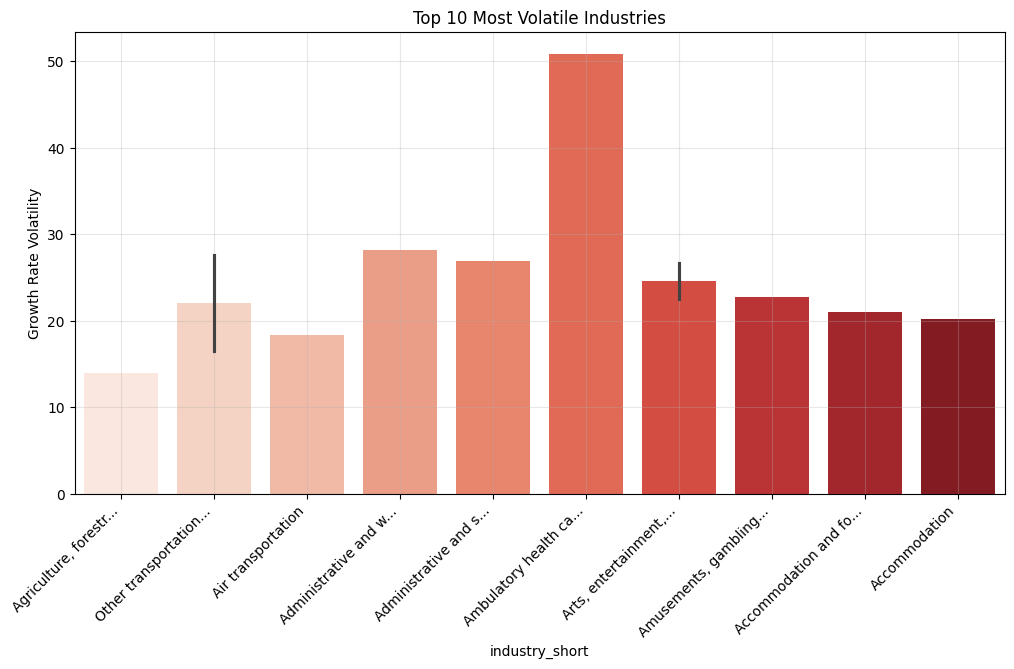

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=arima_ranking_df[arima_ranking_df["industry_short"].isin(volatile_industries)],
            x="industry_short", y="growth_rate", palette="Reds")

plt.title("Top 10 Most Volatile Industries")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Growth Rate Volatility")
plt.grid(alpha=0.3)
plt.show()